# Experimenting with RNNs - Testing Models on Short- and Long-Distance Data

The best way to learn something is to play with it... and break it (for science!).

In this notebook, we will be testing the performance of the following RNN models on simulated data:
- The Elman Unit
- The Long Short-Term Memory Unit (LSTM)
- The Gated Recurrent Unit (GRU)

We will begin with testing a simple linear model on the data to set the baseline for the experiment, and then proceed with playing with the RNN models.

As always, we begin with preparing the data.

## Generating the Data

The time series itself will be random noise. Then, we group the random numbers in sets of three consecutive numbers. The problem setup is as follows: is the group of three numbers positive or negative? The setup is similar to the XOR problem, in the sense that adjacent quadrants do not belong to the same class.

In [1]:
import numpy as np

def get_label(x, i1, i2, i3):
  """
  Returns the class based on whether x[i3] = x[i1] XOR x[i2].
  """
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

T = 10 # our window size
D = 1 # number of features


def gen_data(distance='short'):
    X = []
    Y = []
    # generate our random data
    for t in range(5000):
        x = np.random.randn(T)
        X.append(x)

        if distance=='long':
            y = get_label(x, 0, 1, 2) # long distance
        else:
            y = get_label(x, -1, -2, -3) # short distance
    
        Y.append(y)
    
    return(np.array(X), np.array(Y), len(X))

X, Y, N = gen_data()




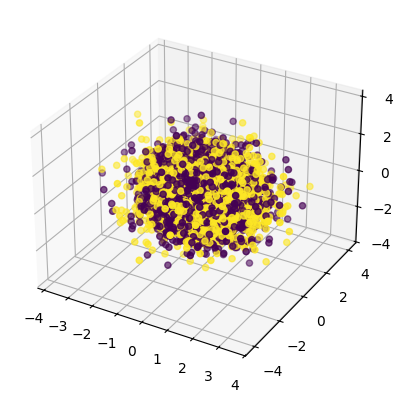

In [2]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=Y)
plt.show()

To interactively visualize the 3D plot, copy the two cells above and run it as a `.py` file on your system.

## Model #1: Linear

In [3]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import Adam

i = Input(shape=(T,))
x = Dense(1, activation='sigmoid')(i)

model = Model(i,x)
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.01),
              metrics=['accuracy'])

r = model.fit(X, Y, epochs=100, validation_split=0.5)

Epoch 1/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5096 - loss: 0.7653 - val_accuracy: 0.5228 - val_loss: 0.7053
Epoch 2/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - accuracy: 0.4968 - loss: 0.6965 - val_accuracy: 0.5008 - val_loss: 0.6967
Epoch 3/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - accuracy: 0.5204 - loss: 0.6943 - val_accuracy: 0.5028 - val_loss: 0.6967
Epoch 4/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - accuracy: 0.5040 - loss: 0.6941 - val_accuracy: 0.4892 - val_loss: 0.6976
Epoch 5/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.5132 - loss: 0.6947 - val_accuracy: 0.4960 - val_loss: 0.6942
Epoch 6/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.5072 - loss: 0.6945 - val_accuracy: 0.4996 - val_loss: 0.6963
Epoch 7/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - accuracy: 0.5092 - loss: 0.6939 - val_accuracy: 0.4940 - val_loss: 0.6965
Epoch 8/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - accuracy: 0.5068 - loss: 0.6946 - val_accura

As always, let's visualize the losses and accuracy.

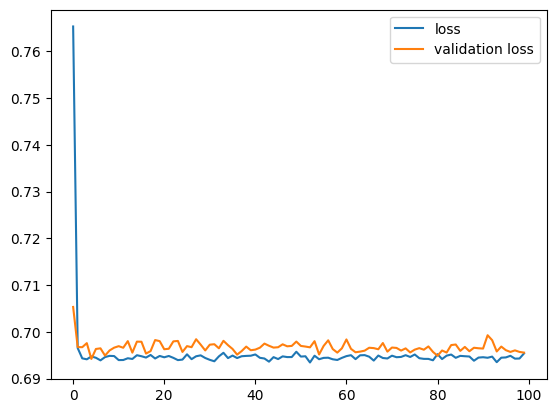

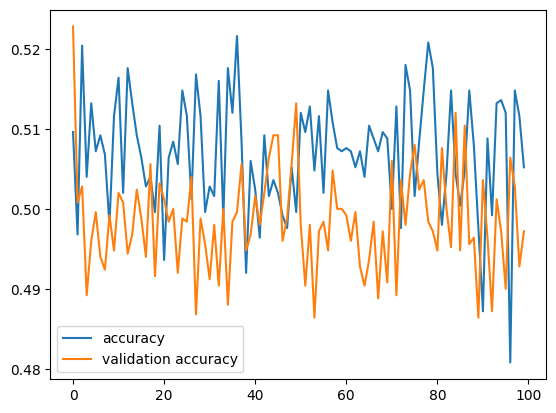

In [4]:
def plot_loss_acc(r):
    plt.plot(r.history['loss'], label='loss')
    plt.plot(r.history['val_loss'], label='validation loss')
    plt.legend()
    plt.show()

    plt.plot(r.history['accuracy'], label='accuracy')
    plt.plot(r.history['val_accuracy'], label='validation accuracy')
    plt.legend()
    plt.show()

plot_loss_acc(r)    

As we can see, the model is practically a coin toss. Let's now test the RNN models.

## RNN - Elman Unit

To make our work easier, we first implement a general RNN model maker.

In [5]:
from keras.layers import SimpleRNN, GRU, LSTM

def RNN_model(name='simple'):
    """
    Returns the relevant RNN model.
    """
    i = Input(shape=(T,D))
    if name == 'LSTM':
        x = LSTM(5)(i)
    elif name == 'GRU':
        x = GRU(5)(i)
    else:
        x = SimpleRNN(5)(i)

    x = Dense(1, activation='sigmoid')(x)
    
    return Model(i,x) 

model = RNN_model()
model.compile(loss='binary_crossentropy', 
              optimizer=Adam(learning_rate=0.01),
              metrics=['accuracy'])

i = Input(shape=(T,D))
inputs = np.expand_dims(X, -1)
r = model.fit(inputs, Y, epochs=150, validation_split=0.5)

Epoch 1/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5976 - loss: 0.6718 - val_accuracy: 0.6744 - val_loss: 0.6421
Epoch 2/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7280 - loss: 0.6035 - val_accuracy: 0.7624 - val_loss: 0.5729
Epoch 3/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7716 - loss: 0.5371 - val_accuracy: 0.7888 - val_loss: 0.5095
Epoch 4/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8112 - loss: 0.4678 - val_accuracy: 0.8076 - val_loss: 0.4478
Epoch 5/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8368 - loss: 0.3997 - val_accuracy: 0.8524 - val_loss: 0.3725
Epoch 6/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8664 - loss: 0.3426 - val_accuracy: 0.8784 - val_loss: 0.3189
Epoch 7/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8936 - loss: 0.2911 - val_accuracy: 0.8960 - val_loss: 0.2772
Epoch 8/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9076 - loss: 0.2557 - val_accuracy: 0.9216 - v

Let's visualize our losses and accuracy.

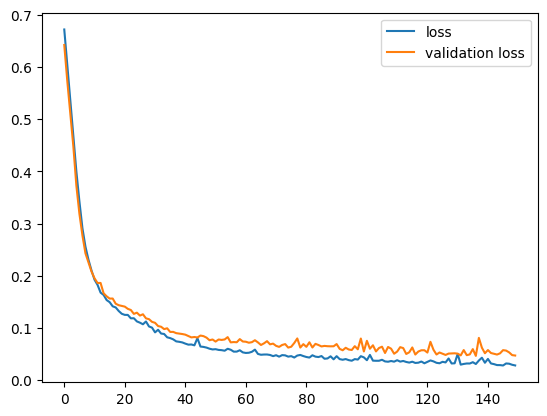

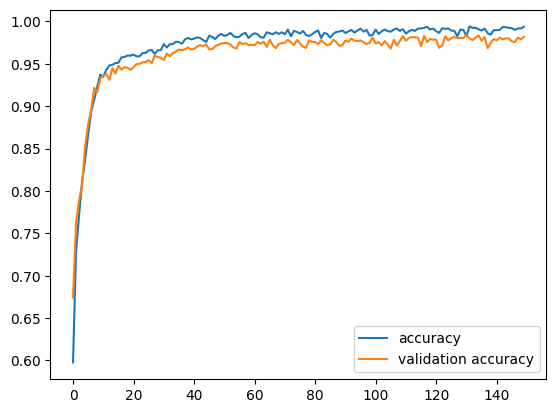

In [6]:
plot_loss_acc(r)

As we'd expect, the RNN model performs better for our current case: a short-distance sequence (the last three data points). Let's now look at how it performs for long-distance data. 

In [7]:
X, Y, N = gen_data('long')

In [8]:
inputs = np.expand_dims(X, -1)
r = model.fit(inputs, Y, epochs=150, validation_split=0.5)

Epoch 1/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5156 - loss: 2.4618 - val_accuracy: 0.4944 - val_loss: 0.7278
Epoch 2/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5064 - loss: 0.7010 - val_accuracy: 0.4932 - val_loss: 0.7034
Epoch 3/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5108 - loss: 0.7009 - val_accuracy: 0.4916 - val_loss: 0.7000
Epoch 4/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5024 - loss: 0.6986 - val_accuracy: 0.5104 - val_loss: 0.6961
Epoch 5/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5084 - loss: 0.6940 - val_accuracy: 0.4960 - val_loss: 0.6964
Epoch 6/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5056 - loss: 0.6922 - val_accuracy: 0.5116 - val_loss: 0.6958
Epoch 7/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5008 - loss: 0.6931 - val_accuracy: 0.5064 - val_loss: 0.6954
Epoch 8/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5096 - loss: 0.6924 - val_accuracy: 0.4960 - v

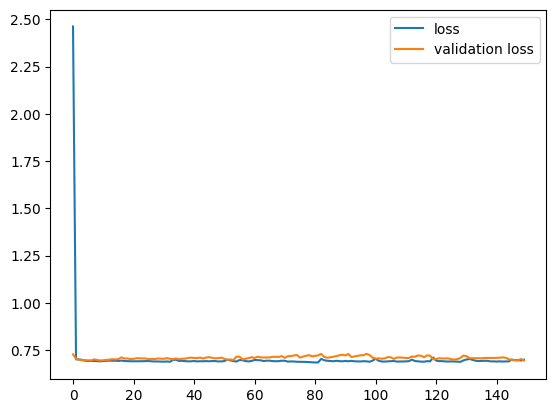

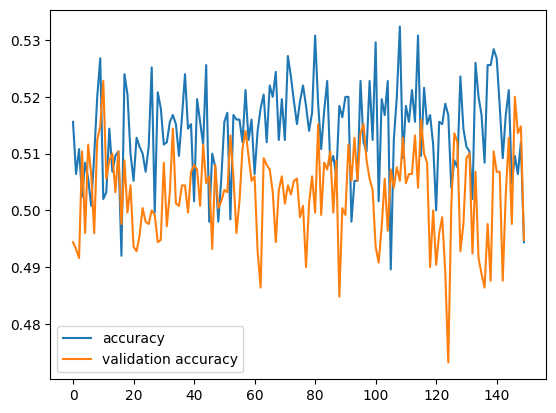

In [9]:
plot_loss_acc(r)

As we'd expect, the simple Elman unit RNN fails to "remember" earlier data. It also suffers from the vanishing gradient problem, because of which earlier weights get updated very very slowly via backpropagation because they go through multiple sigmoids. Let's see how our LSTM and GRU RNNs would perform.

## RNN - Long Short-Term Memory (LSTM) Unit

In [10]:
model = RNN_model('LSTM')
model.compile(loss='binary_crossentropy', 
              optimizer=Adam(learning_rate=0.01),
              metrics=['accuracy'])

r = model.fit(inputs, Y, epochs=150, validation_split=0.5)

Epoch 1/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4980 - loss: 0.6951 - val_accuracy: 0.4972 - val_loss: 0.6945
Epoch 2/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5008 - loss: 0.6934 - val_accuracy: 0.4972 - val_loss: 0.6934
Epoch 3/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5056 - loss: 0.6929 - val_accuracy: 0.4964 - val_loss: 0.6940
Epoch 4/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5068 - loss: 0.6931 - val_accuracy: 0.5116 - val_loss: 0.6933
Epoch 5/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4936 - loss: 0.6933 - val_accuracy: 0.5036 - val_loss: 0.6935
Epoch 6/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5100 - loss: 0.6929 - val_accuracy: 0.5000 - val_loss: 0.6938
Epoch 7/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4936 - loss: 0.6927 - val_accuracy: 0.5048 - val_loss: 0.6935
Epoch 8/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5096 - loss: 0.6925 - val_accuracy: 0.5008 - v

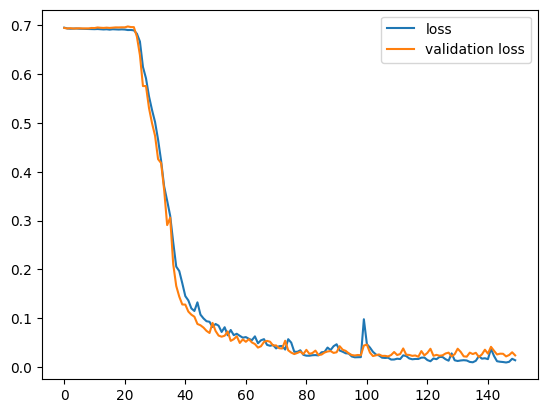

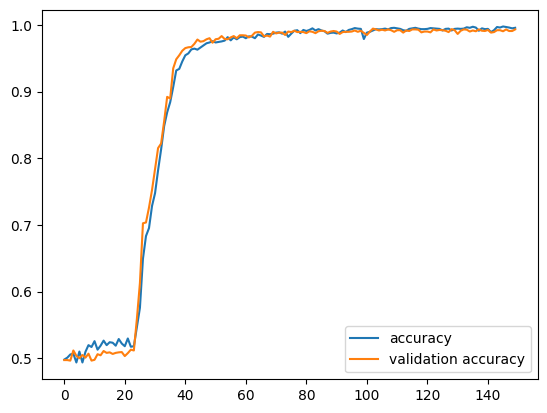

In [11]:
plot_loss_acc(r)

That's a much better performance than the simple RNN model. But what if the series is longer? Let's see how our LSTM performs then.

In [12]:
T = 50
X, Y, N = gen_data('long')

inputs = np.expand_dims(X, -1)
model = RNN_model('LSTM')
model.compile(loss='binary_crossentropy', 
              optimizer=Adam(learning_rate=0.01),
              metrics=['accuracy'])

r = model.fit(inputs, Y, epochs=250, validation_split=0.5)

Epoch 1/250
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5052 - loss: 0.6940 - val_accuracy: 0.5052 - val_loss: 0.6942
Epoch 2/250
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5064 - loss: 0.6938 - val_accuracy: 0.4876 - val_loss: 0.6941
Epoch 3/250
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5008 - loss: 0.6935 - val_accuracy: 0.5016 - val_loss: 0.6942
Epoch 4/250
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5116 - loss: 0.6929 - val_accuracy: 0.4968 - val_loss: 0.6954
Epoch 5/250
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5004 - loss: 0.6934 - val_accuracy: 0.4956 - val_loss: 0.6940
Epoch 6/250
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5040 - loss: 0.6926 - val_accuracy: 0.5004 - val_loss: 0.6947
Epoch 7/250
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5076 - loss: 0.6929 - val_accuracy: 0.4956 - val_loss: 0.6945
Epoch 8/250
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5180 - loss: 0.6922 - val_accuracy: 0.4976 - v

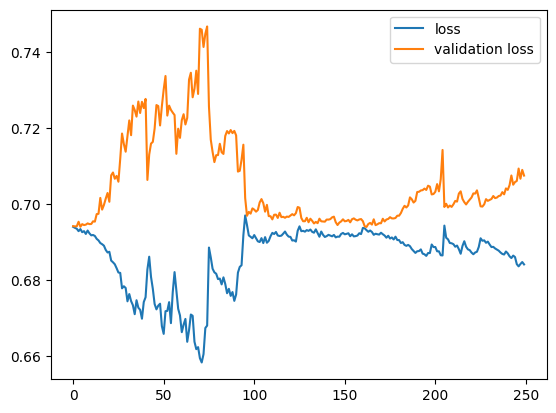

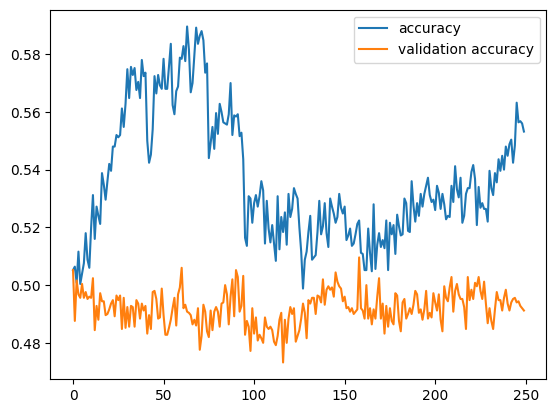

In [13]:
plot_loss_acc(r)

It seems like we've hit our limit with the LSTM. Let's also investigate how the GRU performs with T=10 and T=50.

## RNN - GRU

In [22]:
T = 10
X, Y, N = gen_data('short')

inputs = np.expand_dims(X, -1)

model = RNN_model('GRU')
model.compile(loss='binary_crossentropy', 
              optimizer=Adam(learning_rate=0.01),
              metrics=['accuracy'])

r = model.fit(inputs, Y, epochs=150, validation_split=0.5)

ERROR! Session/line number was not unique in database. History logging moved to new session 3
Epoch 1/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4720 - loss: 0.6951 - val_accuracy: 0.5112 - val_loss: 0.6943
Epoch 2/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4864 - loss: 0.6948 - val_accuracy: 0.5144 - val_loss: 0.6899
Epoch 3/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5520 - loss: 0.6810 - val_accuracy: 0.6132 - val_loss: 0.6548
Epoch 4/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6724 - loss: 0.6045 - val_accuracy: 0.7632 - val_loss: 0.5212
Epoch 5/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7896 - loss: 0.4653 - val_accuracy: 0.8240 - val_loss: 0.3889
Epoch 6/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8500 - loss: 0.3656 - val_accuracy: 0.8752 - val_loss: 0.3302
Epoch 7/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8956 - loss: 0.2989 - val_accuracy: 0.9208 - val_loss: 0.2740
Epoch 8/150
79/79

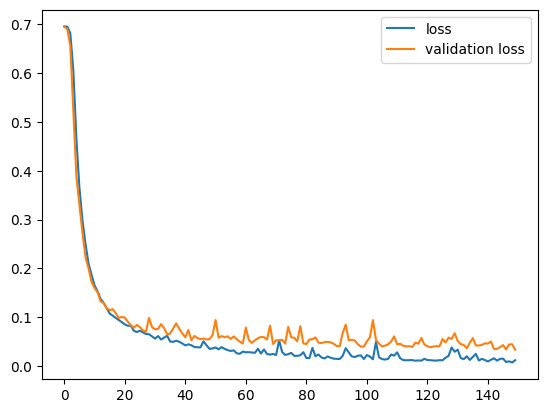

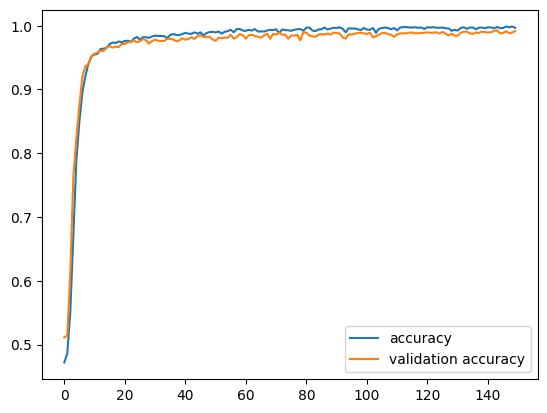

In [23]:
plot_loss_acc(r)

In [24]:
T = 50
X, Y, N = gen_data('long')

inputs = np.expand_dims(X, -1)

model = RNN_model('GRU')
model.compile(loss='binary_crossentropy', 
              optimizer=Adam(learning_rate=0.01),
              metrics=['accuracy'])

r = model.fit(inputs, Y, epochs=250, validation_split=0.5)

Epoch 1/250
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4928 - loss: 0.6956 - val_accuracy: 0.4992 - val_loss: 0.6944
Epoch 2/250
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4968 - loss: 0.6948 - val_accuracy: 0.4924 - val_loss: 0.6938
Epoch 3/250
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5148 - loss: 0.6937 - val_accuracy: 0.4824 - val_loss: 0.6975
Epoch 4/250
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5052 - loss: 0.6937 - val_accuracy: 0.5032 - val_loss: 0.6938
Epoch 5/250
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5048 - loss: 0.6934 - val_accuracy: 0.4996 - val_loss: 0.6948
Epoch 6/250
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5088 - loss: 0.6931 - val_accuracy: 0.4920 - val_loss: 0.6954
Epoch 7/250
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5112 - loss: 0.6931 - val_accuracy: 0.5044 - val_loss: 0.6941
Epoch 8/250
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5164 - loss: 0.6934 - val_accuracy: 0.5052 - v

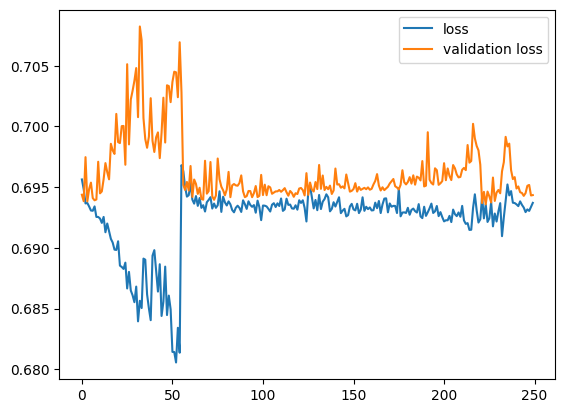

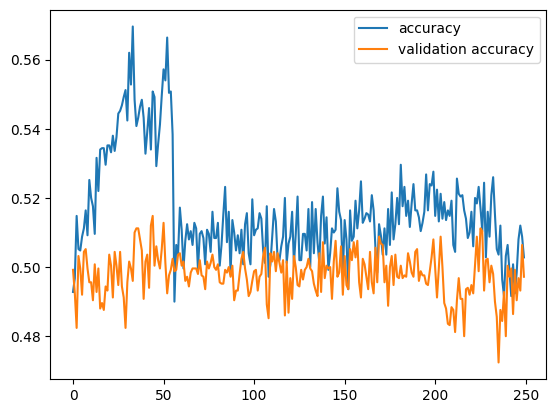

In [25]:
plot_loss_acc(r)

As we'd expect, with the GRU being a simpler version of the LSTM, it performs similarly as our LSTM. How can we make our RNN model better?


## Using a Global Max Pooling Layer

By default, Keras' RNN models only return the final hidden layer. However, we can also have them return all hidden layers, and flatten them into a single layer containing the max values of all hidden layers. We will continue working with the T=50 data.

In [26]:
from keras.layers import GlobalMaxPool1D

# build the model
i = Input(shape=(T,D))
x = LSTM(5, return_sequences=True)(i)
x = GlobalMaxPool1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.01),
              metrics=['accuracy'])

# train the model
r = model.fit(inputs, Y, epochs=150, validation_split=0.5)

Epoch 1/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5048 - loss: 0.6954 - val_accuracy: 0.4996 - val_loss: 0.6957
Epoch 2/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4900 - loss: 0.6946 - val_accuracy: 0.4992 - val_loss: 0.6950
Epoch 3/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4948 - loss: 0.6942 - val_accuracy: 0.4988 - val_loss: 0.6932
Epoch 4/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4980 - loss: 0.6937 - val_accuracy: 0.4968 - val_loss: 0.6941
Epoch 5/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5068 - loss: 0.6930 - val_accuracy: 0.5088 - val_loss: 0.6934
Epoch 6/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5040 - loss: 0.6942 - val_accuracy: 0.4988 - val_loss: 0.6940
Epoch 7/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5144 - loss: 0.6928 - val_accuracy: 0.4996 - val_loss: 0.6958
Epoch 8/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5032 - loss: 0.6934 - val_accuracy: 0.5128 - v

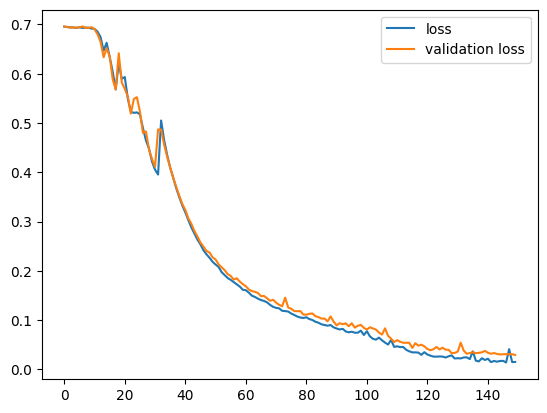

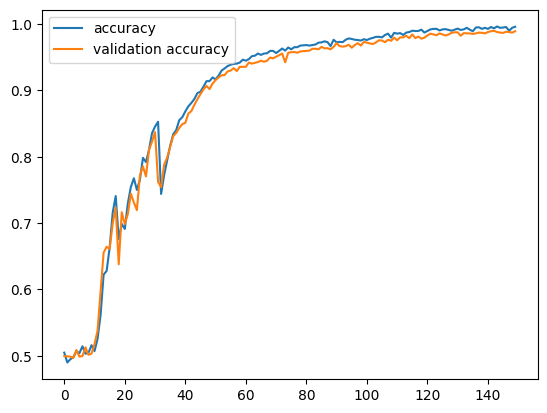

In [27]:
plot_loss_acc(r)

As we can see, the max pooling layer made our results significantly better.

## Extensions

We can further experiment in the following directions:
- How does a max pooling layer affect the performance of the other RNN models, simple and GRU?
- What if our data is not clustered together, i.e. as `i1, i2, i3`, but is rather spread out like `i1, i5, i34`, as is often the case in natural language processing?

Perhaps I'll write more notebooks that extend on our current exploration!

## Conclusion

In this experiment, we systematically explored the performance of several RNN architectures, including the Elman unit, LSTM, and GRU, on a synthetic sequence classification task modeled after the XOR problem. We began by establishing a baseline with a simple linear model, then compared how each RNN handled both short- and long-distance temporal dependencies in the data. After implementing a global max pooling layer with the LSTM, we observed a substantial improvement in validation accuracy, confirming the effectiveness of pooling for aggregating sequence information. These results showcase the importance of both model selection and architectural tweaks when addressing sequence learning tasks, and lay the foundation for further experiments with alternative RNNs and more complex data arrangements.